# Análisis Exploratorio

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

#### Leemos los datos del CSV

In [2]:
# Configurar pandas para que muestre todas las columnas
pd.set_option('display.max_columns', None)

# Configurar pandas para que muestre todas las filas
pd.set_option('display.max_rows', None)

Esta convención se realizó ya que al momento del conteo de variables nulas, NA de Alley se consideraba como null, cuando significa No Alley Access.

In [ ]:
data = pd.read_csv('train.csv', converters={'Alley': lambda x: x})
data['Alley'] = data['Alley'].replace('NA', 'NoAlleyAccess')

<small>Usamos `data.describe()` en Python para obtener un resumen estadístico rápido de los datos en un DataFrame de pandas. Este método proporciona información esencial como la media, la desviación estándar, los valores mínimo y máximo, y los percentiles (25%, 50%, 75%) para cada columna numérica. Esto nos ayuda a entender mejor la distribución y las características generales de los datos, identificar posibles valores atípicos y guiar el análisis exploratorio de datos.</small>

In [46]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<small>El método `pd.info()` en pandas se utiliza para obtener un resumen conciso de un DataFrame. Proporciona información sobre:</small>

- <small>El número de filas y columnas.</small>
- <small>Los nombres de las columnas.</small>
- <small>El tipo de datos de cada columna.</small>
- <small>El número de valores no nulos en cada columna.</small>

<small>Esto es útil para entender rápidamente la estructura y las características básicas del conjunto de datos antes de realizar un análisis más profundo.</small>


In [47]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<small>`isnull().sum()` nos sirve para saber la suma de cuántos valores son nulos para cada columna de nuestro dataset.</small>


In [ ]:
print(data.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

<small>Ahora que ya sabemos cuántos datos faltan, sería mucho mejor saber cuánto porcentaje de ellos falta:</small>


In [53]:
# Porcentaje de datos faltantes por columna
missing_data = (data.isnull().sum() / len(data)) * 100
print(missing_data)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley             0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType       59.726027
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

##### En este caso no nos desharemos de las filas que tengan un valor null, ya que perderiamos bastantes datos.

<small>Ahora veamos cuántos datos están duplicados:</small>


In [54]:
print("La cantidad de valores duplicados es:", data.duplicated().sum())

La cantidad de valores duplicados es: 0


¿Qué variables son cuantitativas y cuáles son cualitativas?

A partir de la descripción de cada variable, se puede clasificar de la siguiente manera:

---

**Variables numéricas (continuas o discretas):**  
- **Id:** Identificador único (numérico, aunque no se usa para modelado).  
- **LotFrontage:** Metros lineales de calle conectados a la propiedad.  
- **LotArea:** Tamaño del lote en pies cuadrados.  
- **OverallQual:** Calificación general de la calidad (valor ordinal representado numéricamente).  
- **OverallCond:** Condición general de la casa (valor ordinal).  
- **YearBuilt:** Año de construcción.  
- **YearRemodAdd:** Año de remodelación o adición.  
- **MasVnrArea:** Área del revestimiento de mampostería en pies cuadrados.  
- **BsmtFinSF1:** Pies cuadrados terminados tipo 1 en el sótano.  
- **BsmtFinSF2:** Pies cuadrados terminados tipo 2 en el sótano.  
- **BsmtUnfSF:** Pies cuadrados sin terminar del sótano.  
- **TotalBsmtSF:** Total de pies cuadrados del sótano.  
- **1stFlrSF:** Área en pies cuadrados del primer piso.  
- **2ndFlrSF:** Área en pies cuadrados del segundo piso.  
- **LowQualFinSF:** Área en pies cuadrados de terminaciones de baja calidad.  
- **GrLivArea:** Área habitable sobre el nivel del suelo.  
- **BsmtFullBath:** Número de baños completos en el sótano.  
- **BsmtHalfBath:** Número de medios baños en el sótano.  
- **FullBath:** Número de baños completos en planta.  
- **HalfBath:** Número de medios baños en planta.  
- **BedroomAbvGr:** Número de dormitorios sobre el nivel del suelo.  
- **KitchenAbvGr:** Número de cocinas sobre el nivel del suelo.  
- **TotRmsAbvGrd:** Total de habitaciones (excluyendo baños).  
- **Fireplaces:** Número de chimeneas.  
- **GarageYrBlt:** Año de construcción del garaje.  
- **GarageCars:** Capacidad del garaje en número de autos.  
- **GarageArea:** Área del garaje en pies cuadrados.  
- **WoodDeckSF:** Área de la terraza de madera en pies cuadrados.  
- **OpenPorchSF:** Área del porche abierto en pies cuadrados.  
- **EnclosedPorch:** Área del porche cerrado en pies cuadrados.  
- **3SsnPorch:** Área del porche de tres estaciones en pies cuadrados.  
- **ScreenPorch:** Área del porche con malla en pies cuadrados.  
- **PoolArea:** Área de la piscina en pies cuadrados.  
- **MiscVal:** Valor monetario de alguna característica miscelánea.  
- **MoSold:** Mes de la venta (MM).  
- **YrSold:** Año de la venta (AAAA).  
- **SalePrice:** Precio de venta.

---

**Variables cualitativas (categóricas):**  
- **MSSubClass:** Tipo de construcción (aunque se exprese numéricamente, representa categorías).  
- **MSZoning:** Clasificación general de la zona.  
- **Street:** Tipo de acceso a la propiedad (Grvl, Pave).  
- **Alley:** Tipo de acceso por callejón (Pave, Grvl o ausencia de acceso, que se codifica con “NA” y se puede cambiar a “NoAlleyAccess”).  
- **LotShape:** Forma general del lote (Reg, IR1, IR2, IR3).  
- **LandContour:** Topografía del terreno (Lvl, Bnk, HLS, Low).  
- **Utilities:** Tipo de servicios disponibles.  
- **LotConfig:** Configuración del lote (Inside, Corner, CulDSac, FR2, FR3).  
- **LandSlope:** Inclinación del terreno (Gtl, Mod, Sev).  
- **Neighborhood:** Ubicación física dentro de la ciudad.  
- **Condition1:** Condición o proximidad a características (Artery, Feedr, Norm, etc.).  
- **Condition2:** Segunda condición en caso de haber más de una.  
- **BldgType:** Tipo de construcción (1Fam, 2FmCon, Duplx, TwnhsE, TwnhsI).  
- **HouseStyle:** Estilo de la casa (1Story, 1.5Fin, 1.5Unf, 2Story, etc.).  
- **RoofStyle:** Tipo de techo (Gable, Hip, etc.).  
- **RoofMatl:** Material del techo (CompShg, MetalSd, etc.).  
- **Exterior1st:** Material del revestimiento exterior principal.  
- **Exterior2nd:** Material del revestimiento exterior secundario (si aplica).  
- **MasVnrType:** Tipo de revestimiento de mampostería (BrkCmn, BrkFace, CBlock, None, Stone).  
- **ExterQual:** Calidad del material exterior.  
- **ExterCond:** Condición actual del material exterior.  
- **Foundation:** Tipo de cimentación.  
- **BsmtQual:** Altura/calidad del sótano.  
- **BsmtCond:** Condición general del sótano.  
- **BsmtExposure:** Exposición o presencia de paredes en nivel de jardín.  
- **BsmtFinType1:** Calificación del área terminada tipo 1 del sótano.  
- **BsmtFinType2:** Calificación del área terminada tipo 2 del sótano (si aplica).  
- **Heating:** Tipo de calefacción.  
- **HeatingQC:** Calidad y condición del sistema de calefacción.  
- **CentralAir:** Si tiene aire acondicionado central (Y/N).  
- **Electrical:** Sistema eléctrico.  
- **KitchenQual:** Calidad de la cocina.  
- **Functional:** Funcionalidad de la casa.  
- **FireplaceQu:** Calidad de la chimenea.  
- **GarageType:** Ubicación/tipo de garaje.  
- **GarageFinish:** Acabado interior del garaje.  
- **GarageQual:** Calidad del garaje.  
- **GarageCond:** Condición del garaje.  
- **PavedDrive:** Tipo de acceso al garaje (Paved, Partial, Dirt/Gravel).  
- **PoolQC:** Calidad de la piscina.  
- **Fence:** Calidad de la cerca.  
- **MiscFeature:** Característica miscelánea no incluida en otras categorías.  
- **SaleType:** Tipo de venta.  
- **SaleCondition:** Condición de la venta.

---

#### ¿Cuál es el propósito de hacer histogramas?

<small> Los histogramas son útiles para visualizar la distribución de datos numéricos. Permiten identificar rápidamente la forma de la distribución (normal, sesgada, bimodal, etc.), la presencia de valores atípicos y cómo están agrupados los valores. Este código genera histogramas de todas las variables numéricas en el conjunto de datos, ajustando el tamaño de la figura para una visualización clara.</small>



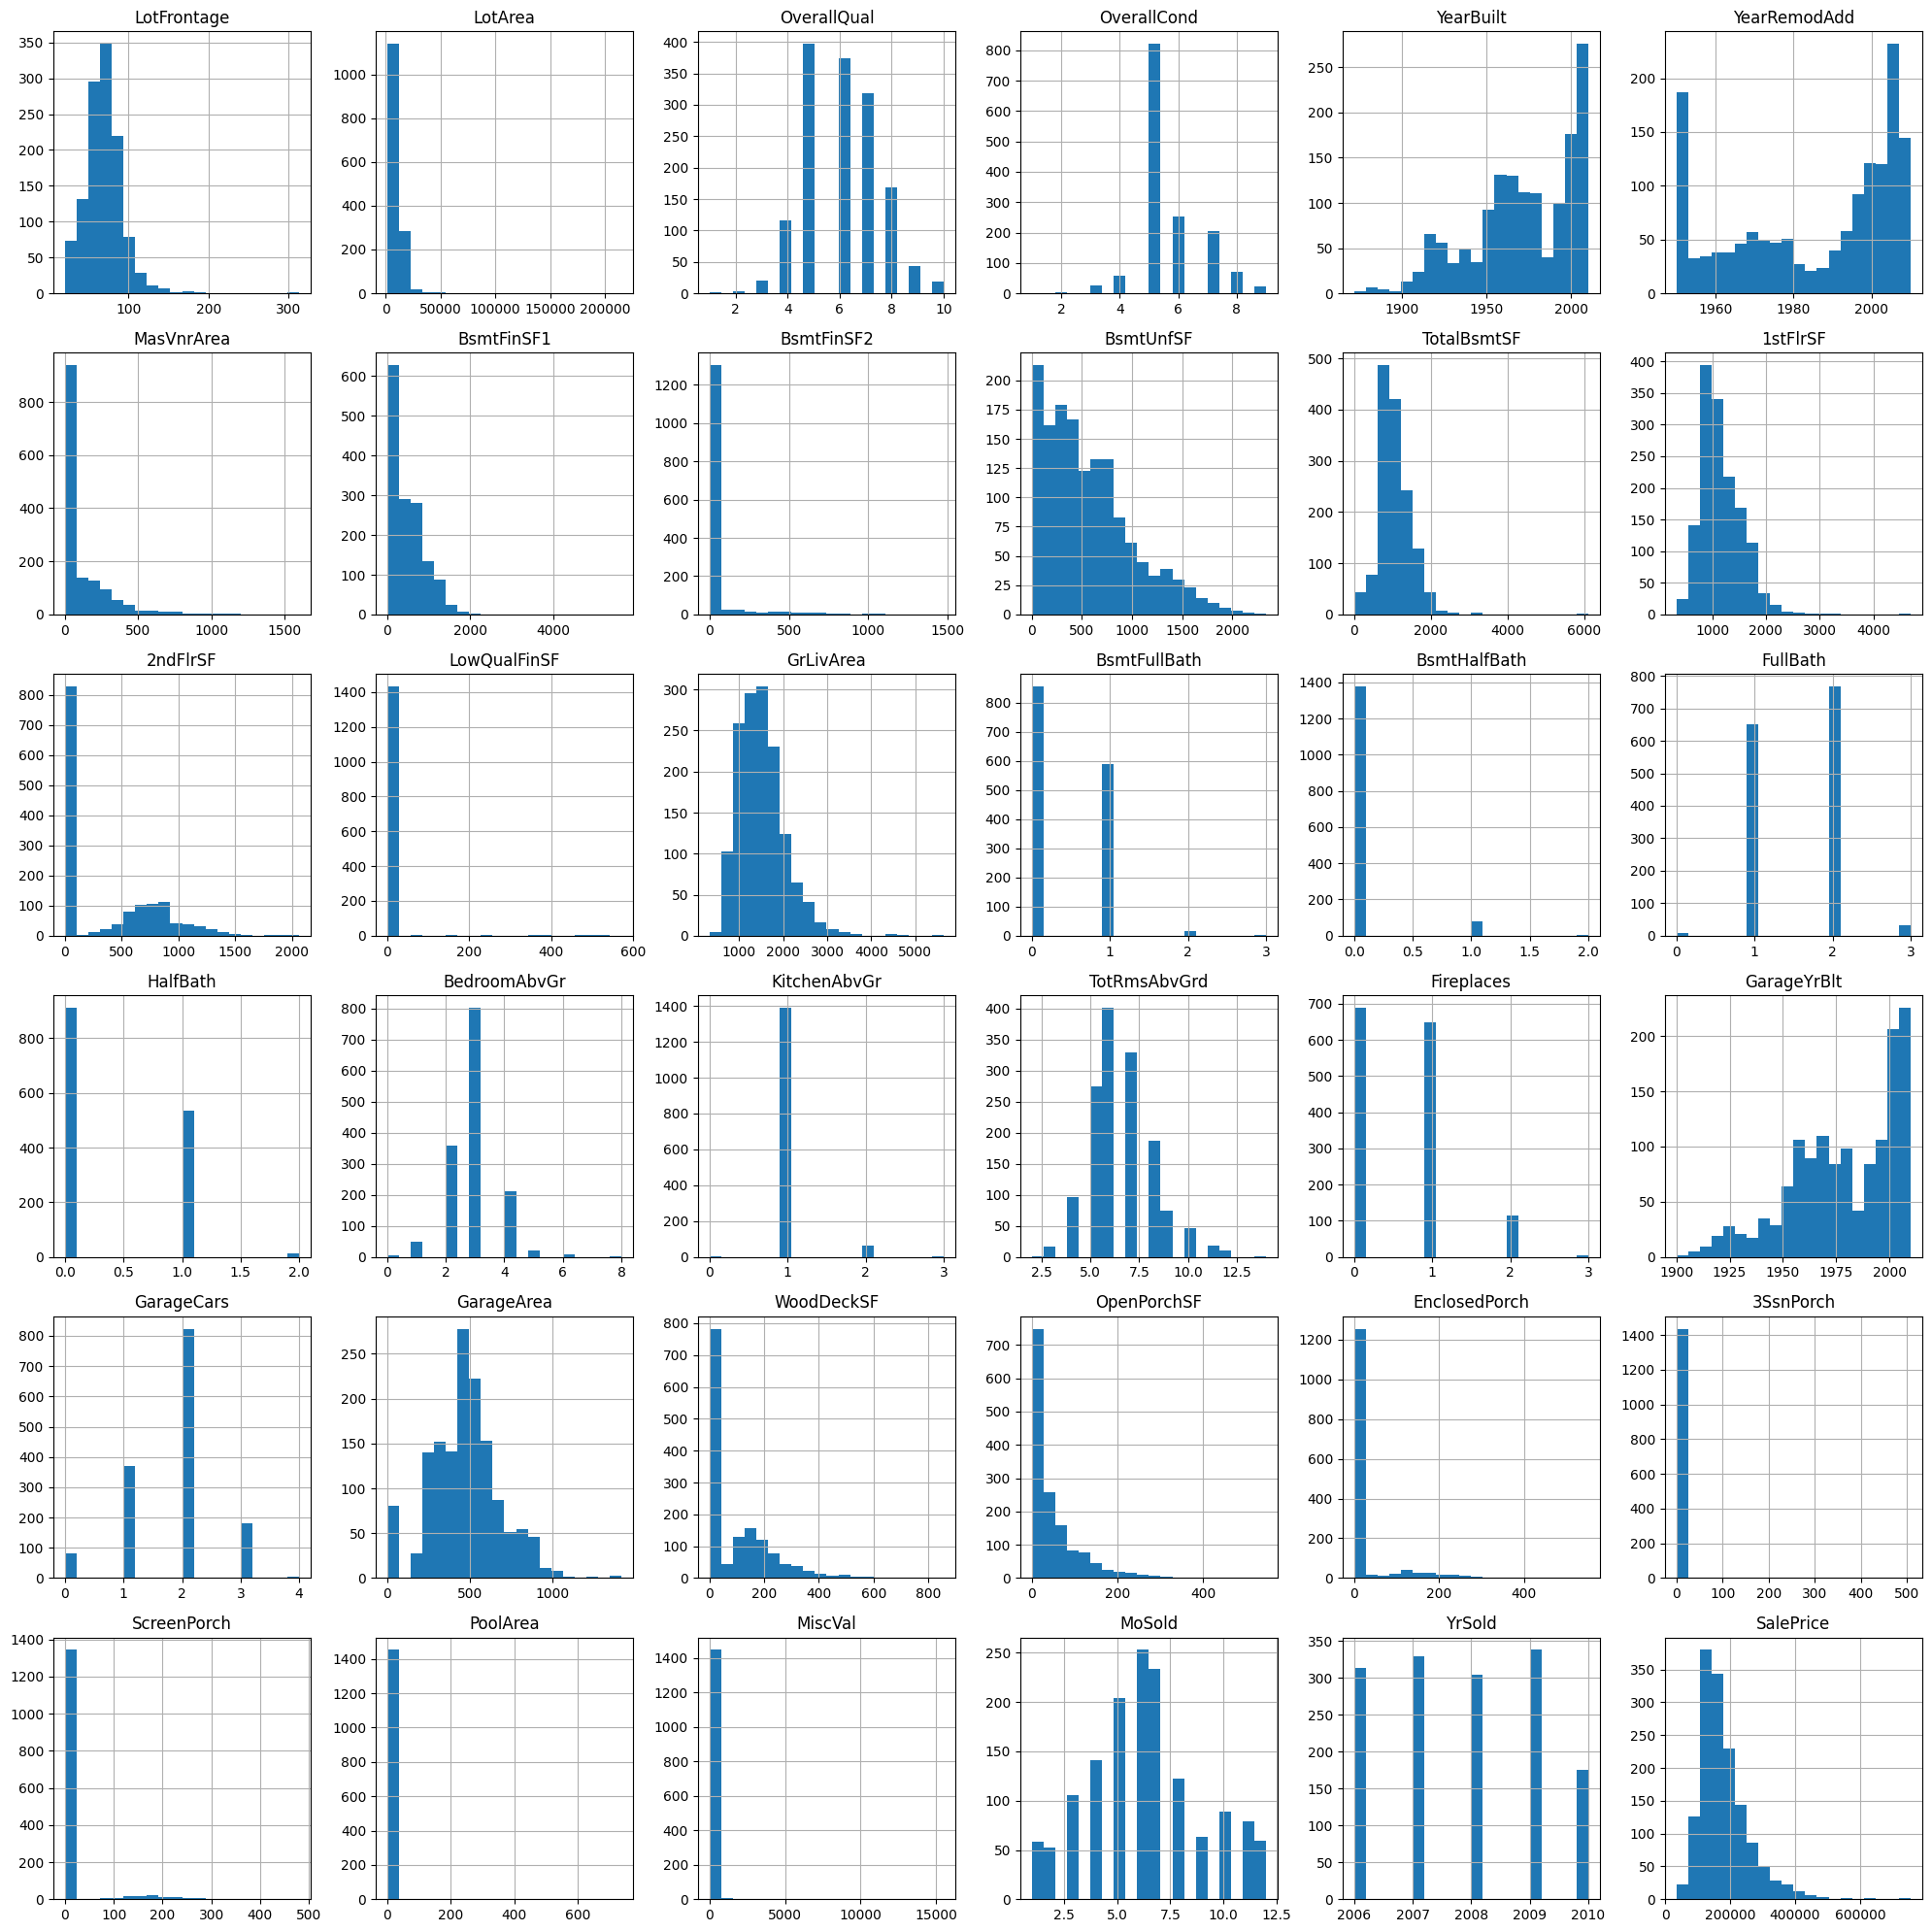

In [71]:
columns_to_plot = [
    'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
    'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 
    '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
    'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 
    'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
    'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'
]

# Filter the columns that exist in data_without_id

data_without_id = data.drop('Id', axis=1)   

existing_columns_to_plot = [col for col in columns_to_plot if col in data_without_id.columns]

data_without_id[existing_columns_to_plot].hist(figsize=(20, 20), bins=20)
plt.tight_layout()
plt.show()


#### ¿Cuál es el propósito de hacer box plots?

<small>Los gráficos de caja muestran la distribución de datos numéricos y son especialmente buenos para identificar valores atípicos y entender la dispersión de los datos (mediante cuartiles y medianas). Este código crea un gráfico de caja para cada variable numérica, organizándolos en una matriz de gráficos para facilitar la comparación.</small>

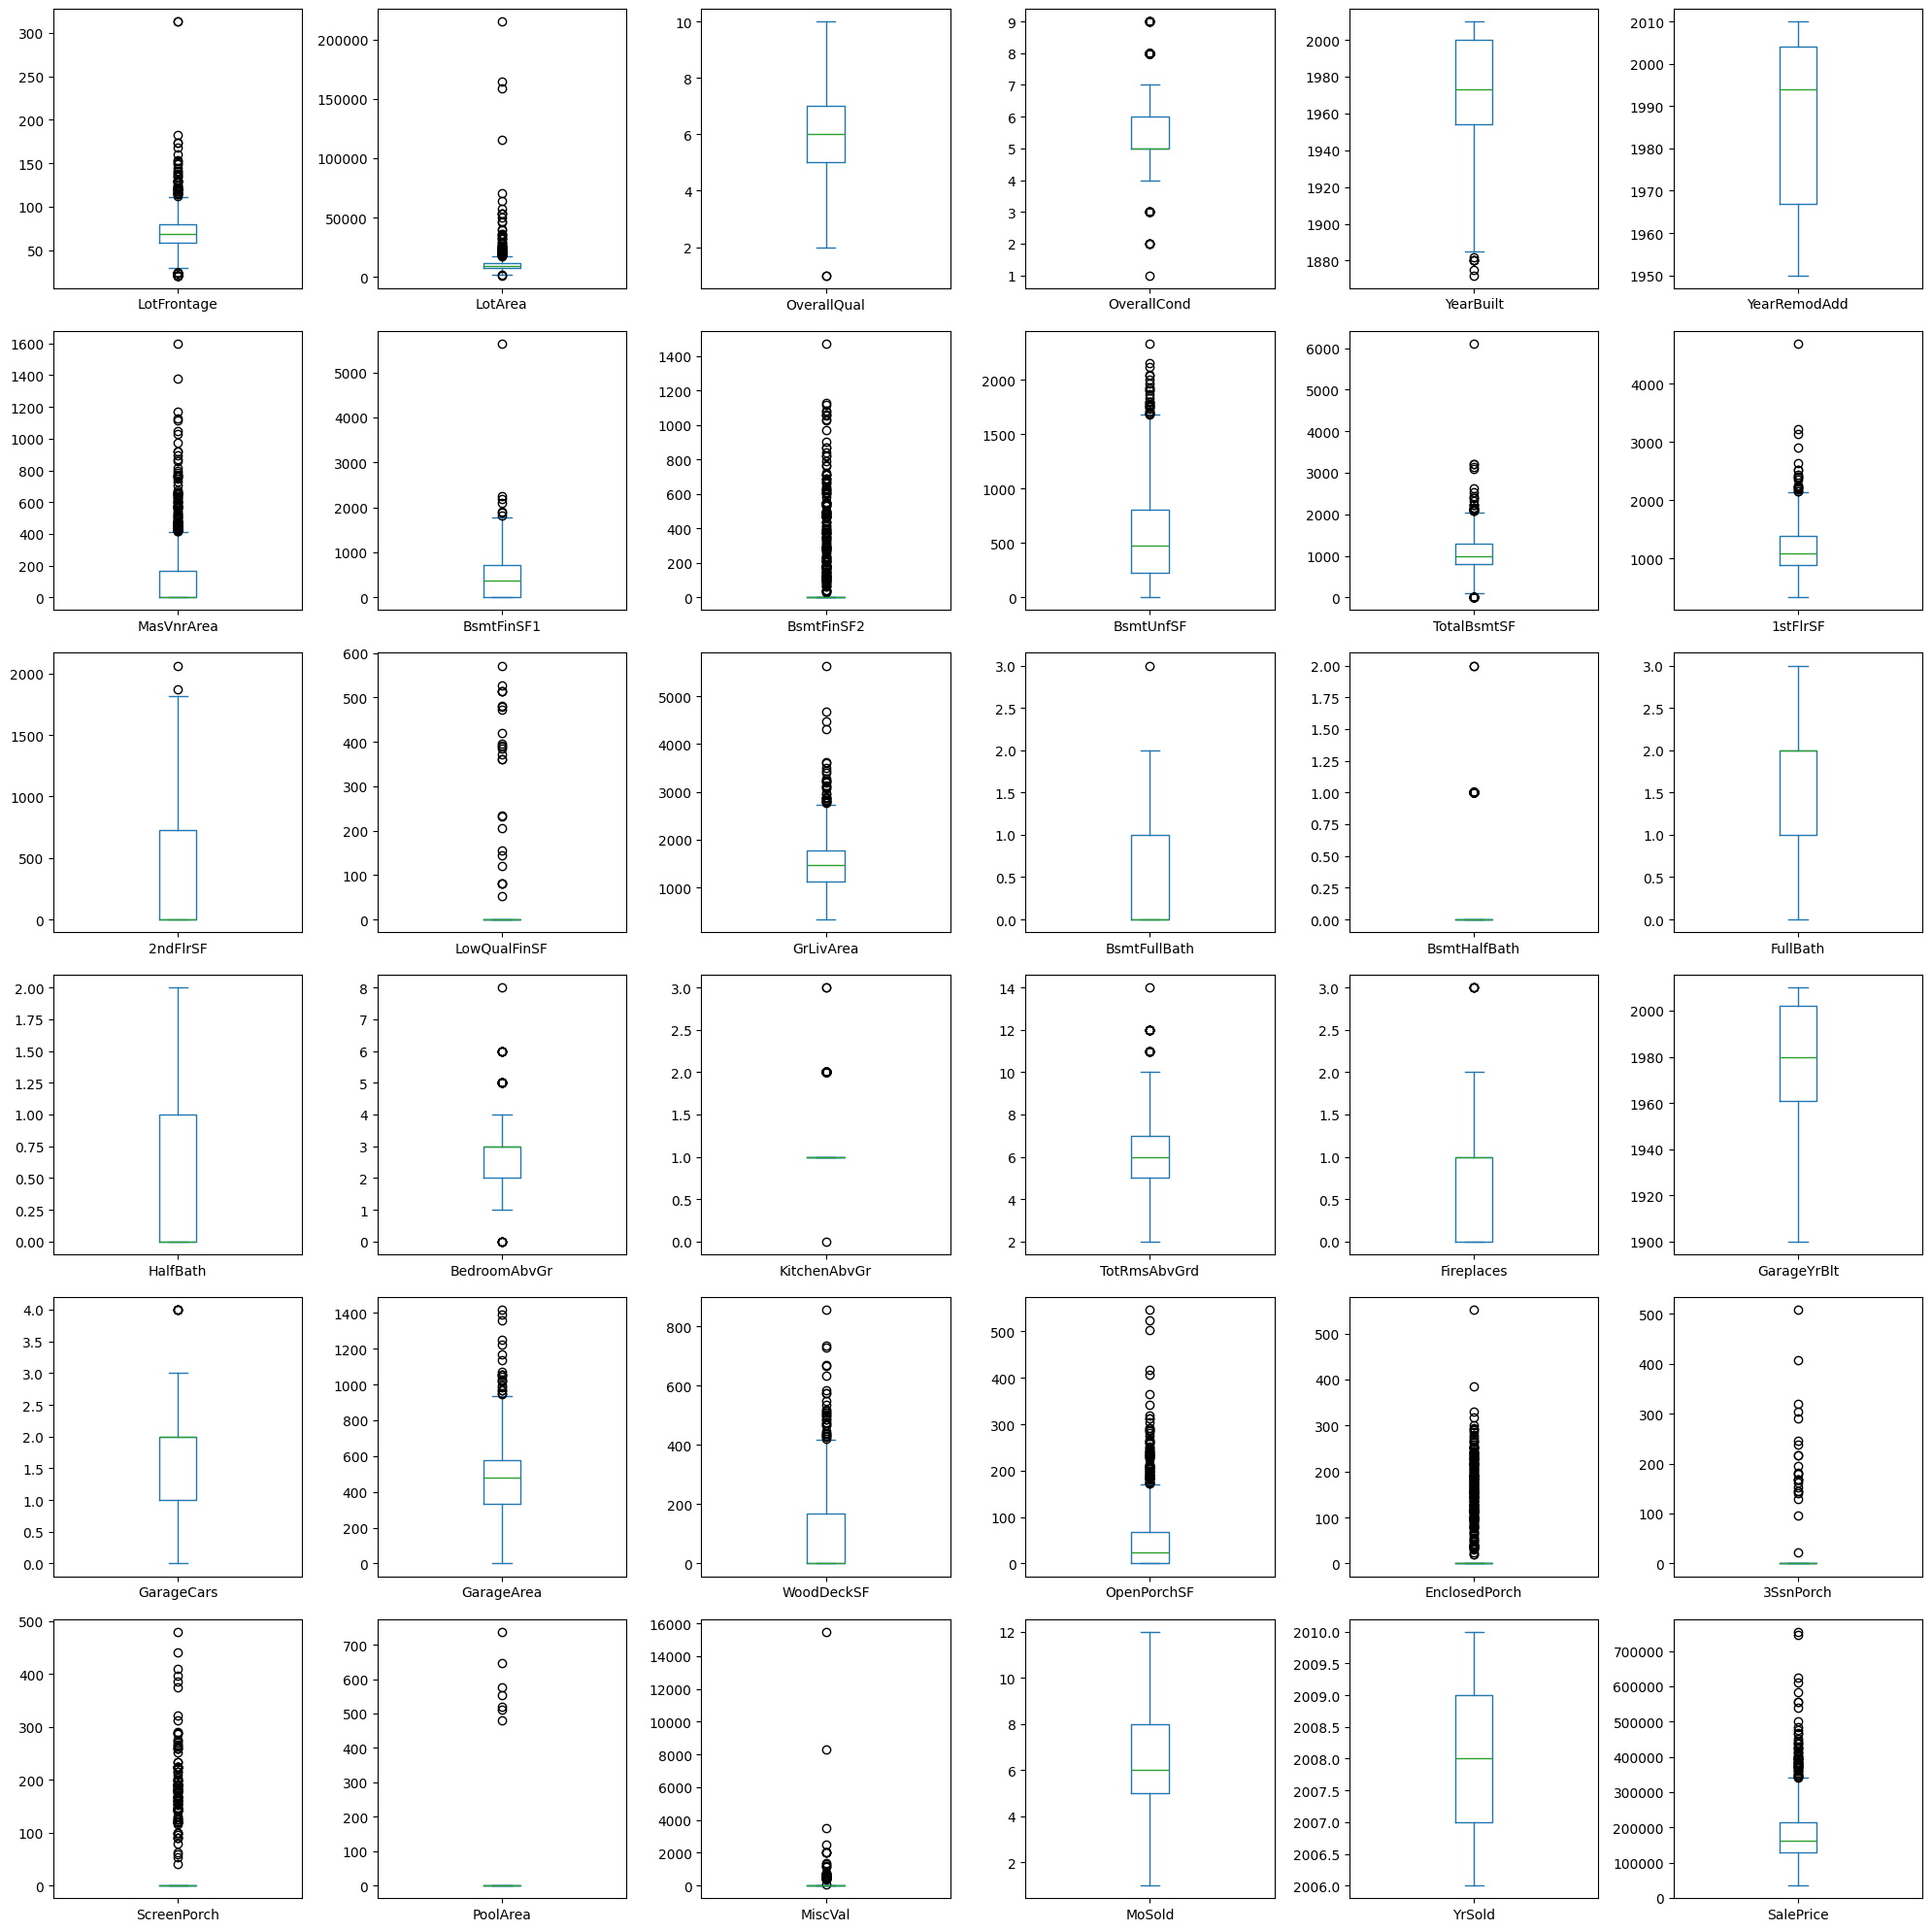

In [72]:
# Filtrar las columnas que existen en data_without_id y son numéricas
existing_columns_to_plot = [col for col in columns_to_plot if col in data_without_id.columns]

# Crear un DataFrame solo con las columnas filtradas
data_for_boxplots = data_without_id[existing_columns_to_plot]

# Generar los box plots
data_for_boxplots.plot(kind='box', subplots=True, layout=(6, 6), figsize=(20, 20))  # Ajusta el layout según necesidad
plt.tight_layout()  # Ajusta el layout para evitar que los gráficos se sobrepongan
plt.show()

#### ¿Cuál es el propósito de hacer una matriz de correlación?

<small>La matriz de correlación es una herramienta para identificar y visualizar correlaciones entre variables numéricas. Los valores de correlación pueden indicar la fuerza y la dirección de la relación lineal entre pares de variables. Este código calcula y muestra la matriz de correlación, ayudando a identificar variables que están potencialmente relacionadas entre sí.</small>


In [73]:
# Select only numeric columns
numeric_data = data_without_id.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()
print(corr_matrix)

               MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.386347 -0.139781     0.032628    -0.059316   
LotFrontage     -0.386347     1.000000  0.426095     0.251646    -0.059213   
LotArea         -0.139781     0.426095  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.251646  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.059213 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.123349  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.088866  0.013788     0.550684     0.073741   
MasVnrArea       0.022936     0.193458  0.104160     0.411876    -0.128101   
BsmtFinSF1      -0.069836     0.233633  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.049900  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.132644 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.392075  0.260833     0.537808   


#### ¿Cuál es el propósito de hacer un mapa de calor de la matriz de correlación?

<small>Los mapas de calor permiten visualizar la matriz de correlación de manera más intuitiva, usando colores para representar los valores de correlación, facilitando la identificación de relaciones fuertes. Este código crea un mapa de calor con anotaciones que muestran los valores exactos de correlación, haciendo la matriz más accesible y fácil de interpretar.</small>

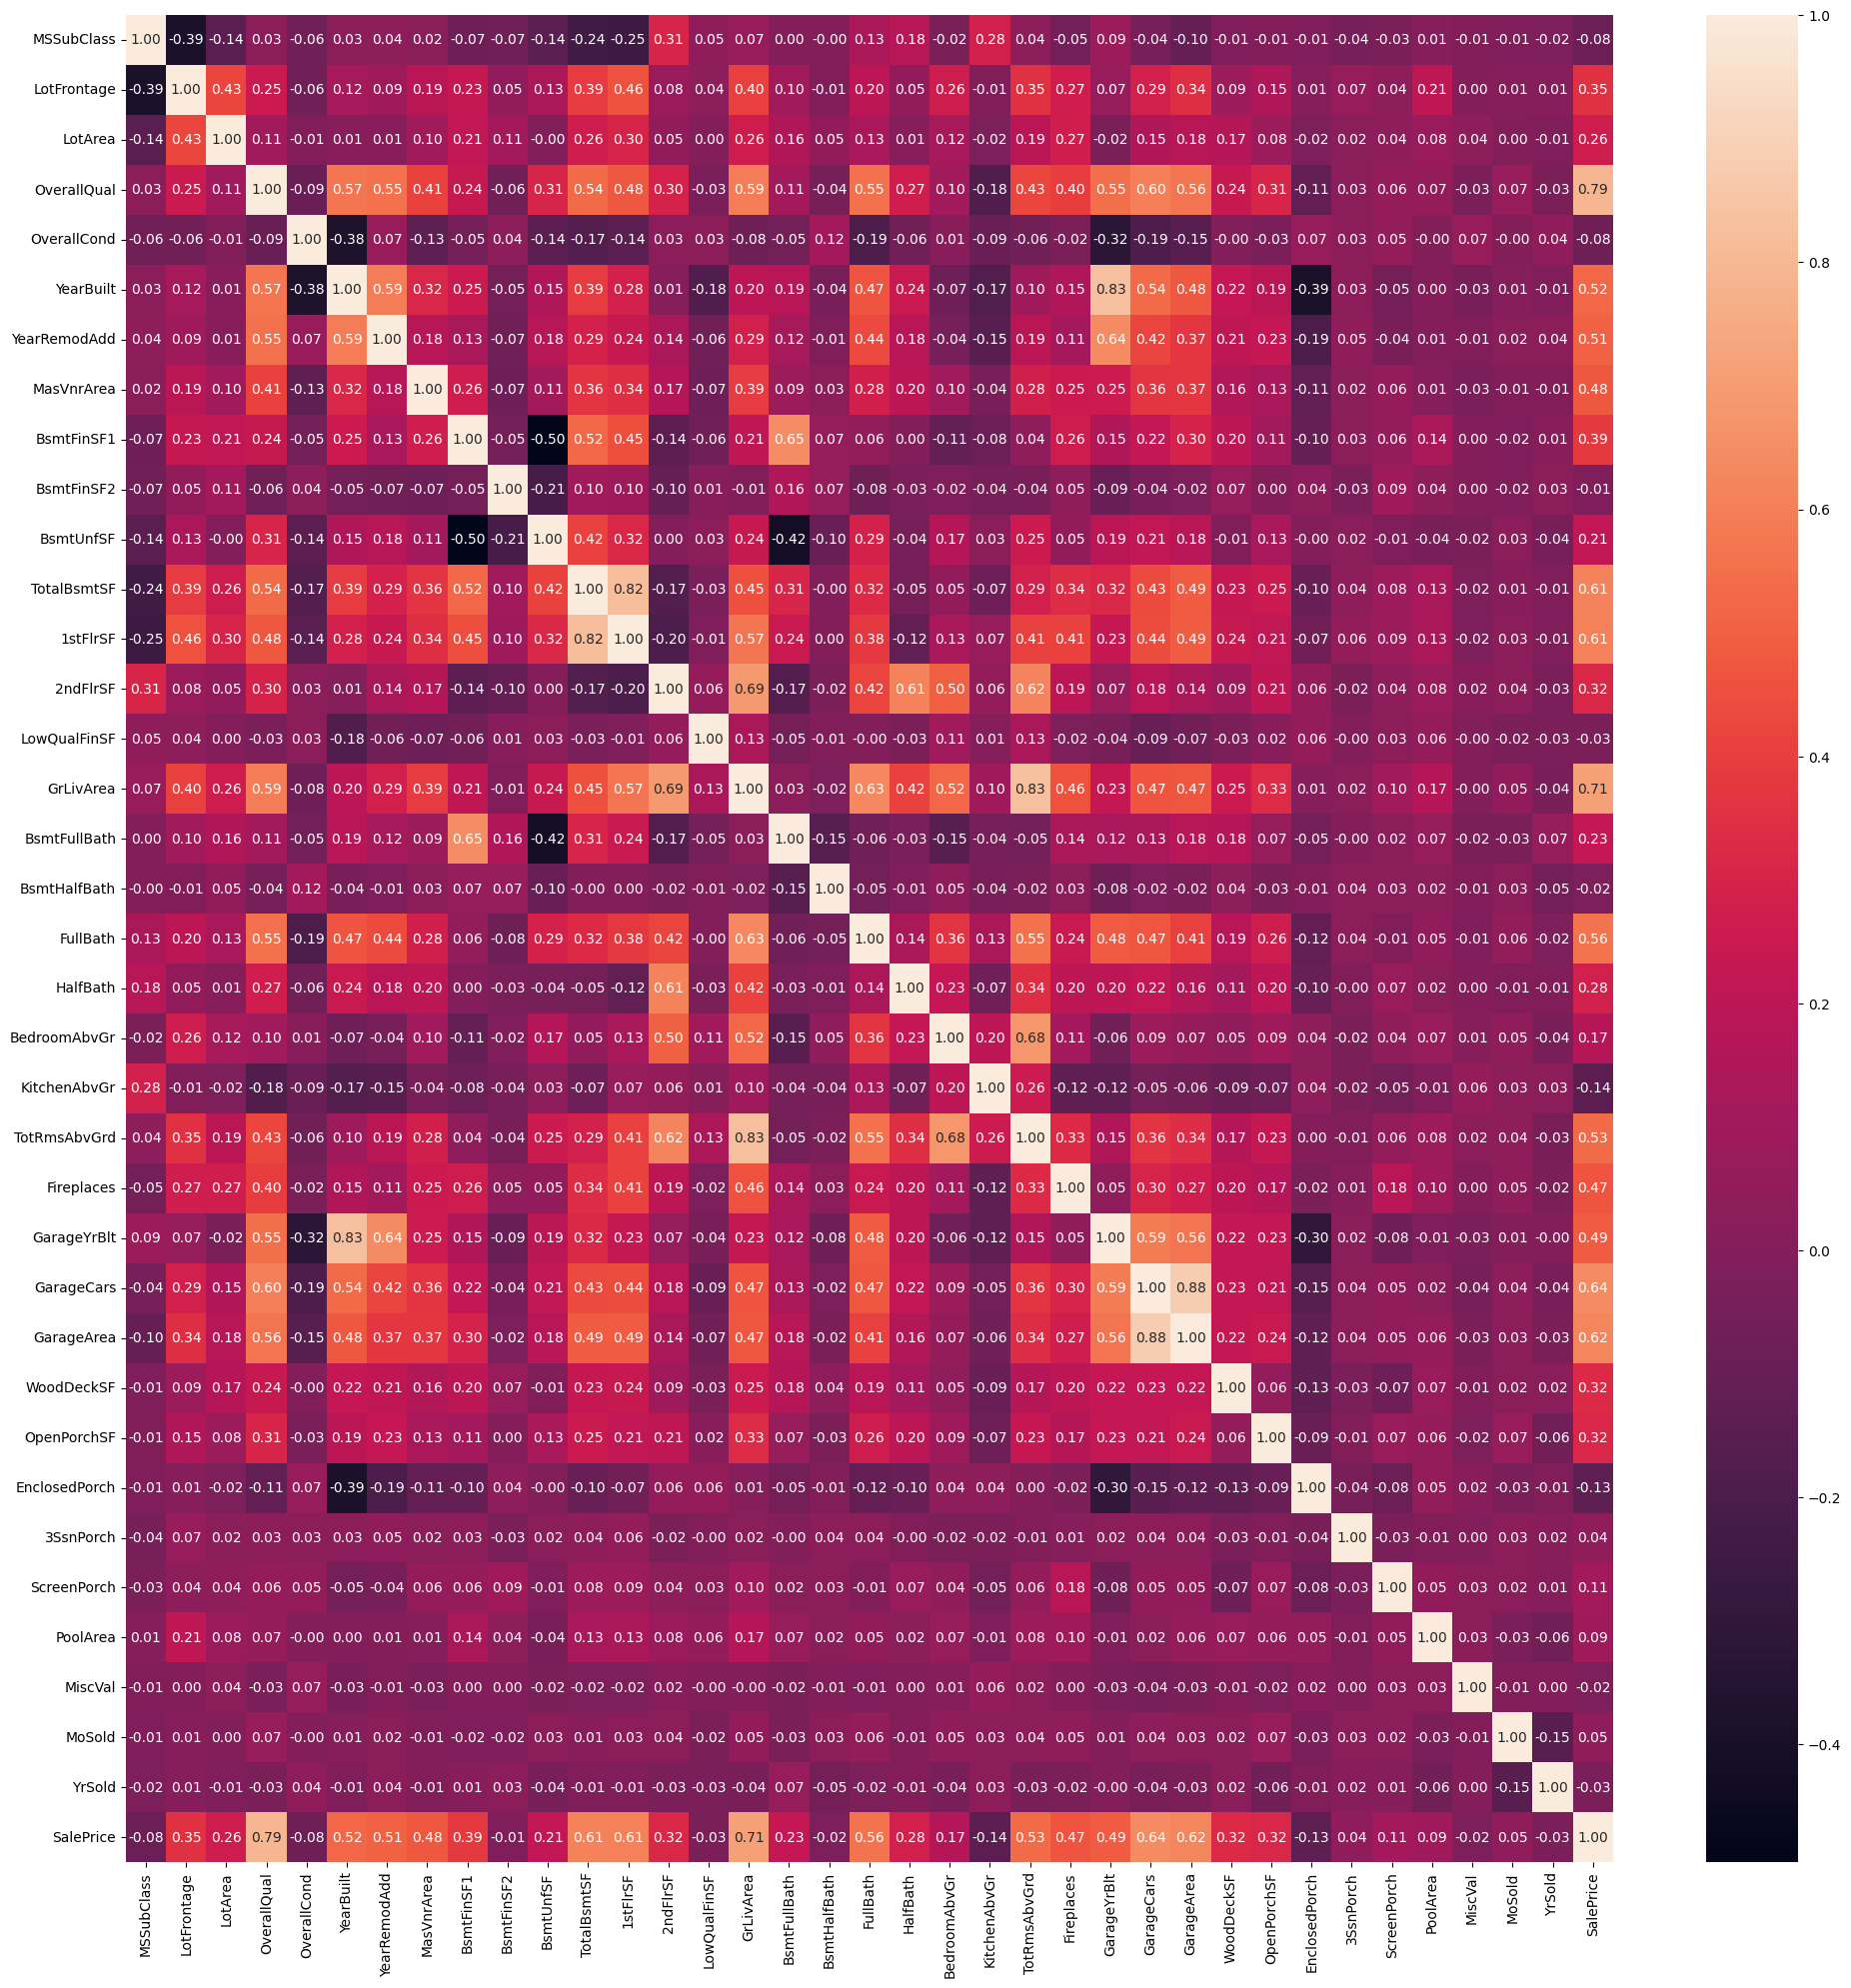

In [74]:
plt.figure(figsize=(24, 24))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()


<small> En este apartado, se muestran las tablas de frecuencia para diversas variables cualitativas dentro del _dataset_. Estas tablas muestran la cantidad de veces que cada valor único aparece en el conjunto de datos, proporcionando una visión clara de la distribución y prevalencia de las características observadas. Este análisis ayuda a identificar tendencias, valores atípicos y posibles inconsistencias en los datos.

A continuación, se detallan las tablas de frecuencia para las siguientes variables del _dataset_:

- **MSSubClass:** Tipo de construcción (aunque se exprese numéricamente, representa categorías).  
- **MSZoning:** Clasificación general de la zona.  
- **Street:** Tipo de acceso a la propiedad (Grvl, Pave).  
- **Alley:** Tipo de acceso por callejón (Pave, Grvl o ausencia de acceso, que se codifica con “NA” y se puede cambiar a “NoAlleyAccess”).  
- **LotShape:** Forma general del lote (Reg, IR1, IR2, IR3).  
- **LandContour:** Topografía del terreno (Lvl, Bnk, HLS, Low).  
- **Utilities:** Tipo de servicios disponibles.  
- **LotConfig:** Configuración del lote (Inside, Corner, CulDSac, FR2, FR3).  
- **LandSlope:** Inclinación del terreno (Gtl, Mod, Sev).  
- **Neighborhood:** Ubicación física dentro de la ciudad.  
- **Condition1:** Condición o proximidad a características (Artery, Feedr, Norm, etc.).  
- **Condition2:** Segunda condición en caso de haber más de una.  
- **BldgType:** Tipo de construcción (1Fam, 2FmCon, Duplx, TwnhsE, TwnhsI).  
- **HouseStyle:** Estilo de la casa (1Story, 1.5Fin, 1.5Unf, 2Story, etc.).  
- **RoofStyle:** Tipo de techo (Gable, Hip, etc.).  
- **RoofMatl:** Material del techo (CompShg, MetalSd, etc.).  
- **Exterior1st:** Material del revestimiento exterior principal.  
- **Exterior2nd:** Material del revestimiento exterior secundario (si aplica).  
- **MasVnrType:** Tipo de revestimiento de mampostería (BrkCmn, BrkFace, CBlock, None, Stone).  
- **ExterQual:** Calidad del material exterior.  
- **ExterCond:** Condición actual del material exterior.  
- **Foundation:** Tipo de cimentación.  
- **BsmtQual:** Altura/calidad del sótano.  
- **BsmtCond:** Condición general del sótano.  
- **BsmtExposure:** Exposición o presencia de paredes en nivel de jardín.  
- **BsmtFinType1:** Calificación del área terminada tipo 1 del sótano.  
- **BsmtFinType2:** Calificación del área terminada tipo 2 del sótano (si aplica).  
- **Heating:** Tipo de calefacción.  
- **HeatingQC:** Calidad y condición del sistema de calefacción.  
- **CentralAir:** Si tiene aire acondicionado central (Y/N).  
- **Electrical:** Sistema eléctrico.  
- **KitchenQual:** Calidad de la cocina.  
- **Functional:** Funcionalidad de la casa.  
- **FireplaceQu:** Calidad de la chimenea.  
- **GarageType:** Ubicación/tipo de garaje.  
- **GarageFinish:** Acabado interior del garaje.  
- **GarageQual:** Calidad del garaje.  
- **GarageCond:** Condición del garaje.  
- **PavedDrive:** Tipo de acceso al garaje (Paved, Partial, Dirt/Gravel).  
- **PoolQC:** Calidad de la piscina.  
- **Fence:** Calidad de la cerca.  
- **MiscFeature:** Característica miscelánea no incluida en otras categorías.  
- **SaleType:** Tipo de venta.  
- **SaleCondition:** Condición de la venta.
</small>


In [75]:
# List of qualitative (categorical) columns to analyze
cualitative_columns = [
    'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 
    'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
    'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
    'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
    'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 
    'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 
    'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'
]

# Creating a frequency table dictionary where the key is the column name and the value is the frequency count of unique entries in that column, including NaN values
freq_table = {col: data[col].value_counts(dropna=False) for col in cualitative_columns}

# Printing the frequency table for each column
for column, table in freq_table.items():
    display(table.reset_index().head(30))
    print(f"Tabla de frecuencias para la variable: {column}")
    print("\n")

,MSSubClass,count
0,20,536
1,60,299
2,50,144
3,120,87
4,30,69
5,160,63
6,70,60
7,80,58
8,90,52
9,190,30


Tabla de frecuencias para la variable: MSSubClass




,MSZoning,count
0,RL,1151
1,RM,218
2,FV,65
3,RH,16
4,C (all),10


Tabla de frecuencias para la variable: MSZoning




,Street,count
0,Pave,1454
1,Grvl,6


Tabla de frecuencias para la variable: Street




,Alley,count
0,NoAlleyAccess,1369
1,Grvl,50
2,Pave,41


Tabla de frecuencias para la variable: Alley




,LotShape,count
0,Reg,925
1,IR1,484
2,IR2,41
3,IR3,10


Tabla de frecuencias para la variable: LotShape




,LandContour,count
0,Lvl,1311
1,Bnk,63
2,HLS,50
3,Low,36


Tabla de frecuencias para la variable: LandContour




,Utilities,count
0,AllPub,1459
1,NoSeWa,1


Tabla de frecuencias para la variable: Utilities




,LotConfig,count
0,Inside,1052
1,Corner,263
2,CulDSac,94
3,FR2,47
4,FR3,4


Tabla de frecuencias para la variable: LotConfig




,LandSlope,count
0,Gtl,1382
1,Mod,65
2,Sev,13


Tabla de frecuencias para la variable: LandSlope




,Neighborhood,count
0,NAmes,225
1,CollgCr,150
2,OldTown,113
3,Edwards,100
4,Somerst,86
5,Gilbert,79
6,NridgHt,77
7,Sawyer,74
8,NWAmes,73
9,SawyerW,59


Tabla de frecuencias para la variable: Neighborhood




,Condition1,count
0,Norm,1260
1,Feedr,81
2,Artery,48
3,RRAn,26
4,PosN,19
5,RRAe,11
6,PosA,8
7,RRNn,5
8,RRNe,2


Tabla de frecuencias para la variable: Condition1




,Condition2,count
0,Norm,1445
1,Feedr,6
2,Artery,2
3,RRNn,2
4,PosN,2
5,PosA,1
6,RRAn,1
7,RRAe,1


Tabla de frecuencias para la variable: Condition2




,BldgType,count
0,1Fam,1220
1,TwnhsE,114
2,Duplex,52
3,Twnhs,43
4,2fmCon,31


Tabla de frecuencias para la variable: BldgType




,HouseStyle,count
0,1Story,726
1,2Story,445
2,1.5Fin,154
3,SLvl,65
4,SFoyer,37
5,1.5Unf,14
6,2.5Unf,11
7,2.5Fin,8


Tabla de frecuencias para la variable: HouseStyle




,RoofStyle,count
0,Gable,1141
1,Hip,286
2,Flat,13
3,Gambrel,11
4,Mansard,7
5,Shed,2


Tabla de frecuencias para la variable: RoofStyle




,RoofMatl,count
0,CompShg,1434
1,Tar&Grv,11
2,WdShngl,6
3,WdShake,5
4,Metal,1
5,Membran,1
6,Roll,1
7,ClyTile,1


Tabla de frecuencias para la variable: RoofMatl




,Exterior1st,count
0,VinylSd,515
1,HdBoard,222
2,MetalSd,220
3,Wd Sdng,206
4,Plywood,108
5,CemntBd,61
6,BrkFace,50
7,WdShing,26
8,Stucco,25
9,AsbShng,20


Tabla de frecuencias para la variable: Exterior1st




,Exterior2nd,count
0,VinylSd,504
1,MetalSd,214
2,HdBoard,207
3,Wd Sdng,197
4,Plywood,142
5,CmentBd,60
6,Wd Shng,38
7,Stucco,26
8,BrkFace,25
9,AsbShng,20


Tabla de frecuencias para la variable: Exterior2nd




,MasVnrType,count
0,NaN,872
1,BrkFace,445
2,Stone,128
3,BrkCmn,15


Tabla de frecuencias para la variable: MasVnrType




,ExterQual,count
0,TA,906
1,Gd,488
2,Ex,52
3,Fa,14


Tabla de frecuencias para la variable: ExterQual




,ExterCond,count
0,TA,1282
1,Gd,146
2,Fa,28
3,Ex,3
4,Po,1


Tabla de frecuencias para la variable: ExterCond




,Foundation,count
0,PConc,647
1,CBlock,634
2,BrkTil,146
3,Slab,24
4,Stone,6
5,Wood,3


Tabla de frecuencias para la variable: Foundation




,BsmtQual,count
0,TA,649
1,Gd,618
2,Ex,121
3,NaN,37
4,Fa,35


Tabla de frecuencias para la variable: BsmtQual




,BsmtCond,count
0,TA,1311
1,Gd,65
2,Fa,45
3,NaN,37
4,Po,2


Tabla de frecuencias para la variable: BsmtCond




,BsmtExposure,count
0,No,953
1,Av,221
2,Gd,134
3,Mn,114
4,NaN,38


Tabla de frecuencias para la variable: BsmtExposure




,BsmtFinType1,count
0,Unf,430
1,GLQ,418
2,ALQ,220
3,BLQ,148
4,Rec,133
5,LwQ,74
6,NaN,37


Tabla de frecuencias para la variable: BsmtFinType1




,BsmtFinType2,count
0,Unf,1256
1,Rec,54
2,LwQ,46
3,NaN,38
4,BLQ,33
5,ALQ,19
6,GLQ,14


Tabla de frecuencias para la variable: BsmtFinType2




,Heating,count
0,GasA,1428
1,GasW,18
2,Grav,7
3,Wall,4
4,OthW,2
5,Floor,1


Tabla de frecuencias para la variable: Heating




,HeatingQC,count
0,Ex,741
1,TA,428
2,Gd,241
3,Fa,49
4,Po,1


Tabla de frecuencias para la variable: HeatingQC




,CentralAir,count
0,Y,1365
1,N,95


Tabla de frecuencias para la variable: CentralAir




,Electrical,count
0,SBrkr,1334
1,FuseA,94
2,FuseF,27
3,FuseP,3
4,Mix,1
5,NaN,1


Tabla de frecuencias para la variable: Electrical




,KitchenQual,count
0,TA,735
1,Gd,586
2,Ex,100
3,Fa,39


Tabla de frecuencias para la variable: KitchenQual




,Functional,count
0,Typ,1360
1,Min2,34
2,Min1,31
3,Mod,15
4,Maj1,14
5,Maj2,5
6,Sev,1


Tabla de frecuencias para la variable: Functional




,FireplaceQu,count
0,NaN,690
1,Gd,380
2,TA,313
3,Fa,33
4,Ex,24
5,Po,20


Tabla de frecuencias para la variable: FireplaceQu




,GarageType,count
0,Attchd,870
1,Detchd,387
2,BuiltIn,88
3,NaN,81
4,Basment,19
5,CarPort,9
6,2Types,6


Tabla de frecuencias para la variable: GarageType




,GarageFinish,count
0,Unf,605
1,RFn,422
2,Fin,352
3,NaN,81


Tabla de frecuencias para la variable: GarageFinish




,GarageQual,count
0,TA,1311
1,NaN,81
2,Fa,48
3,Gd,14
4,Ex,3
5,Po,3


Tabla de frecuencias para la variable: GarageQual




,GarageCond,count
0,TA,1326
1,NaN,81
2,Fa,35
3,Gd,9
4,Po,7
5,Ex,2


Tabla de frecuencias para la variable: GarageCond




,PavedDrive,count
0,Y,1340
1,N,90
2,P,30


Tabla de frecuencias para la variable: PavedDrive




,PoolQC,count
0,NaN,1453
1,Gd,3
2,Ex,2
3,Fa,2


Tabla de frecuencias para la variable: PoolQC




,Fence,count
0,NaN,1179
1,MnPrv,157
2,GdPrv,59
3,GdWo,54
4,MnWw,11


Tabla de frecuencias para la variable: Fence




,MiscFeature,count
0,NaN,1406
1,Shed,49
2,Gar2,2
3,Othr,2
4,TenC,1


Tabla de frecuencias para la variable: MiscFeature




,SaleType,count
0,WD,1267
1,New,122
2,COD,43
3,ConLD,9
4,ConLI,5
5,ConLw,5
6,CWD,4
7,Oth,3
8,Con,2


Tabla de frecuencias para la variable: SaleType




,SaleCondition,count
0,Normal,1198
1,Partial,125
2,Abnorml,101
3,Family,20
4,Alloca,12
5,AdjLand,4


Tabla de frecuencias para la variable: SaleCondition




#### Por último, realizamos pruebas de normalidad para saber si hay columnas numéricas que sigan una distribución normal

--- LotFrontage ---


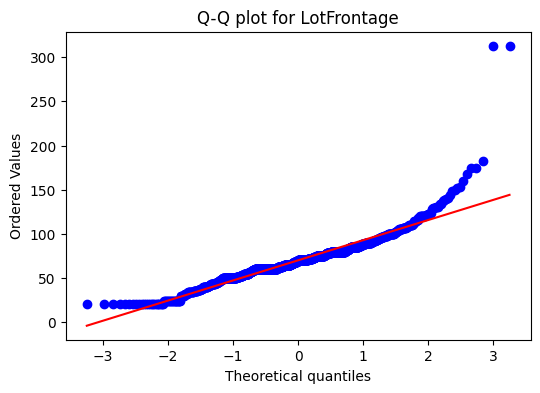

Kolmogorov-Smirnov Test for LotFrontage:
Statistic: 0.10453466306020898, p-value: 7.00884231047927e-12 (La distribución no es normal)


--- LotArea ---


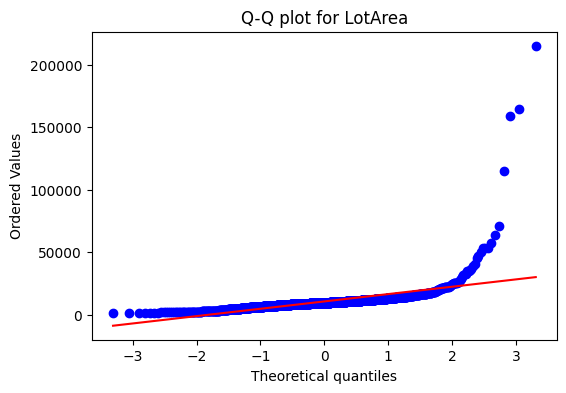

Kolmogorov-Smirnov Test for LotArea:
Statistic: 0.25151649472952176, p-value: 7.056901032865304e-82 (La distribución no es normal)


--- OverallQual ---


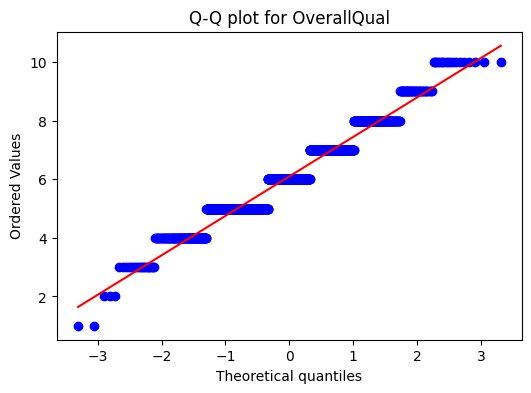

Kolmogorov-Smirnov Test for OverallQual:
Statistic: 0.15515123808494163, p-value: 3.7026132636893505e-31 (La distribución no es normal)


--- OverallCond ---


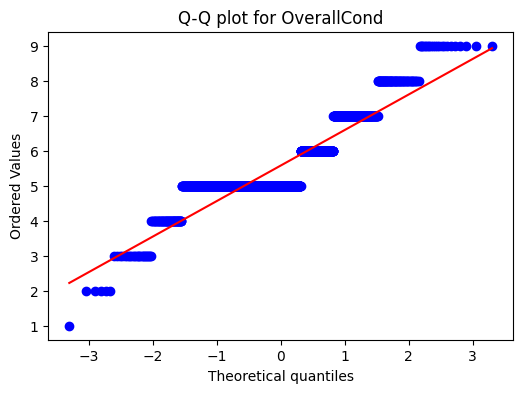

Kolmogorov-Smirnov Test for OverallCond:
Statistic: 0.320032567092765, p-value: 1.6297823327606544e-133 (La distribución no es normal)


--- YearBuilt ---


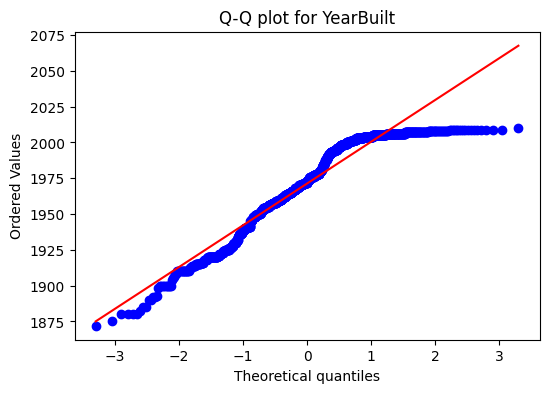

Kolmogorov-Smirnov Test for YearBuilt:
Statistic: 0.12094512318512884, p-value: 4.549120343148646e-19 (La distribución no es normal)


--- YearRemodAdd ---


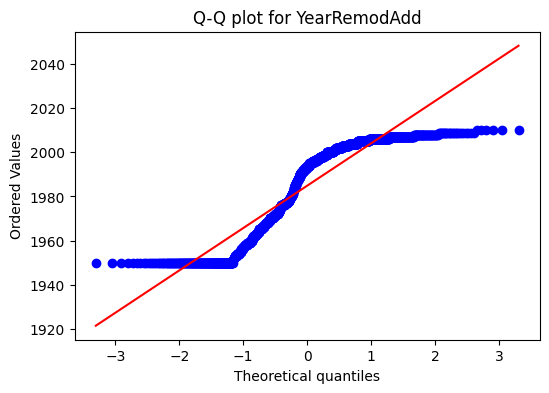

Kolmogorov-Smirnov Test for YearRemodAdd:
Statistic: 0.1745427837283362, p-value: 2.2697910128802713e-39 (La distribución no es normal)


--- MasVnrArea ---


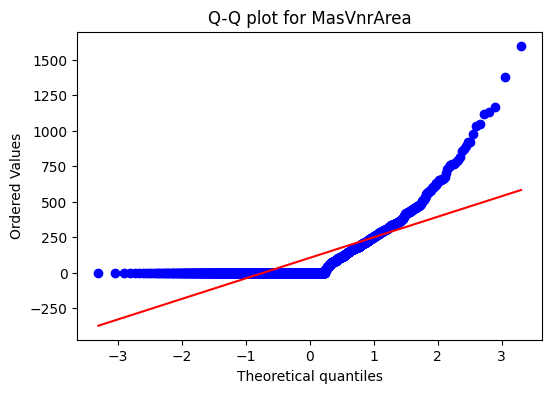

Kolmogorov-Smirnov Test for MasVnrArea:
Statistic: 0.3095300535268923, p-value: 4.800988966336061e-124 (La distribución no es normal)


--- BsmtFinSF1 ---


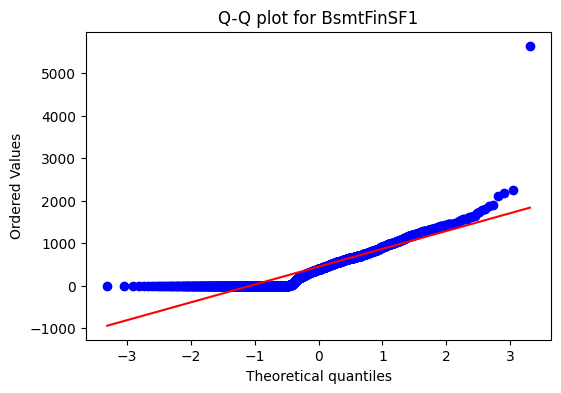

Kolmogorov-Smirnov Test for BsmtFinSF1:
Statistic: 0.16535496605850036, p-value: 2.346806662168636e-35 (La distribución no es normal)


--- BsmtFinSF2 ---


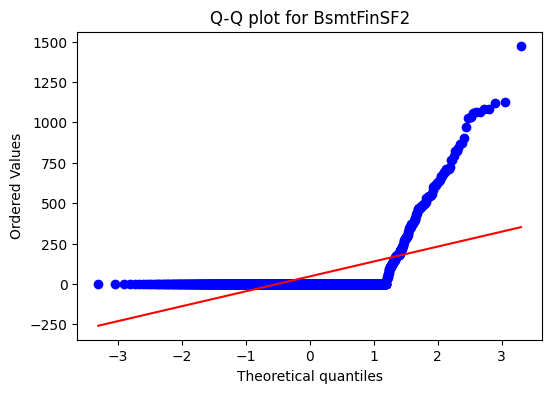

Kolmogorov-Smirnov Test for BsmtFinSF2:
Statistic: 0.49915507256355085, p-value: 0.0 (La distribución no es normal)


--- BsmtUnfSF ---


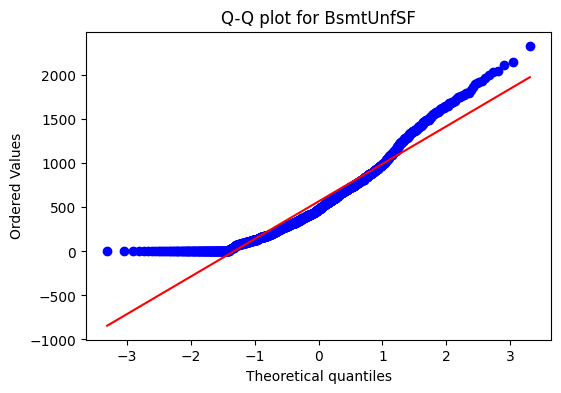

Kolmogorov-Smirnov Test for BsmtUnfSF:
Statistic: 0.09961721409257124, p-value: 4.588029190768422e-13 (La distribución no es normal)


--- TotalBsmtSF ---


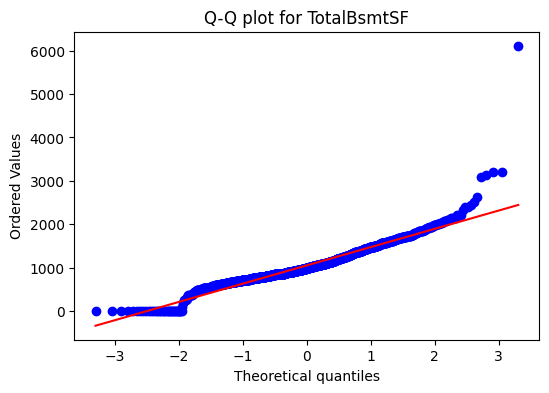

Kolmogorov-Smirnov Test for TotalBsmtSF:
Statistic: 0.07595241767117666, p-value: 9.017864995352675e-08 (La distribución no es normal)


--- 1stFlrSF ---


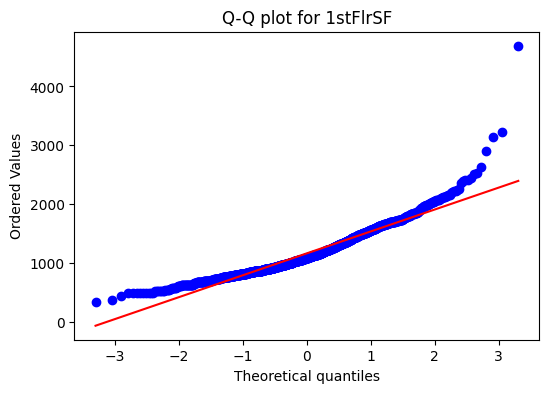

Kolmogorov-Smirnov Test for 1stFlrSF:
Statistic: 0.08692092515771055, p-value: 4.786390792128831e-10 (La distribución no es normal)


--- 2ndFlrSF ---


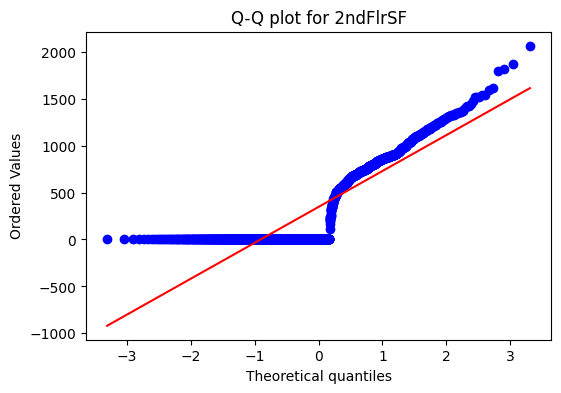

Kolmogorov-Smirnov Test for 2ndFlrSF:
Statistic: 0.3544697247558114, p-value: 1.2698786884090974e-164 (La distribución no es normal)


--- LowQualFinSF ---


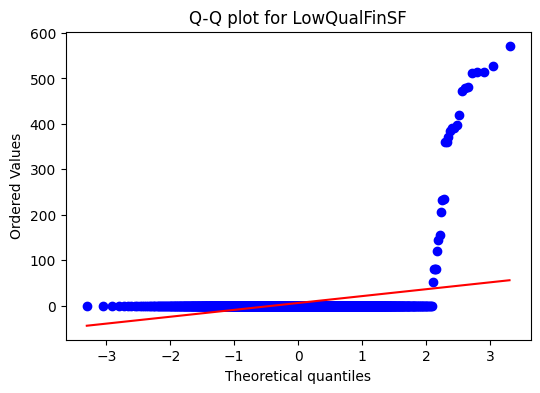

Kolmogorov-Smirnov Test for LowQualFinSF:
Statistic: 0.5300296350231832, p-value: 0.0 (La distribución no es normal)


--- GrLivArea ---


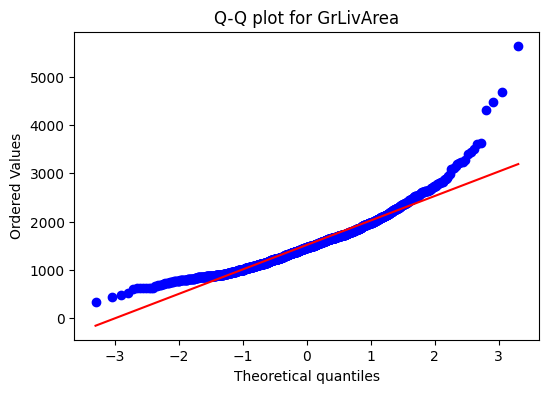

Kolmogorov-Smirnov Test for GrLivArea:
Statistic: 0.06751636542375661, p-value: 3.1311414991041942e-06 (La distribución no es normal)


--- BsmtFullBath ---


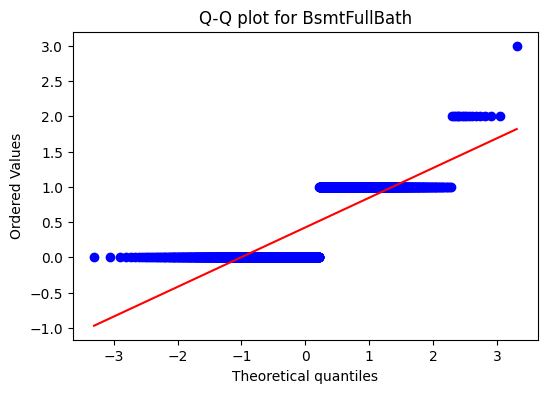

Kolmogorov-Smirnov Test for BsmtFullBath:
Statistic: 0.38010309274302706, p-value: 4.072229575938791e-190 (La distribución no es normal)


--- BsmtHalfBath ---


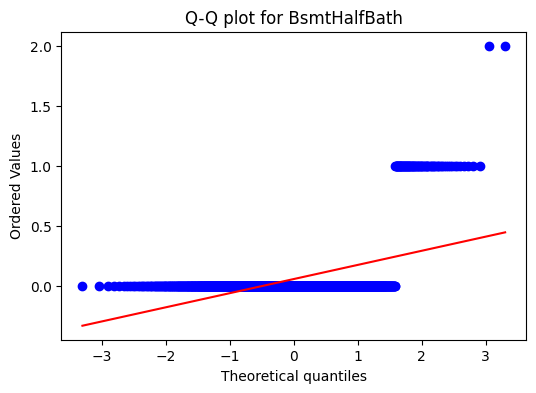

Kolmogorov-Smirnov Test for BsmtHalfBath:
Statistic: 0.5390497134230368, p-value: 0.0 (La distribución no es normal)


--- FullBath ---


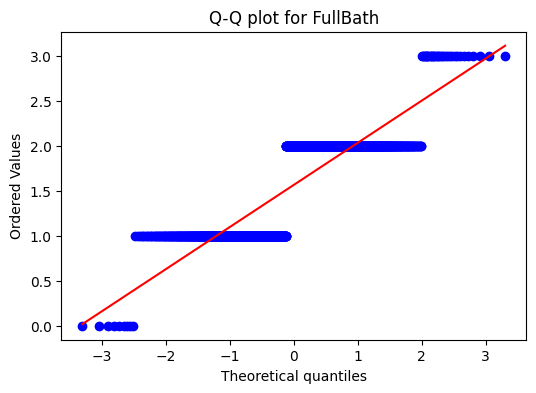

Kolmogorov-Smirnov Test for FullBath:
Statistic: 0.3337114633014864, p-value: 1.9026993648164253e-145 (La distribución no es normal)


--- HalfBath ---


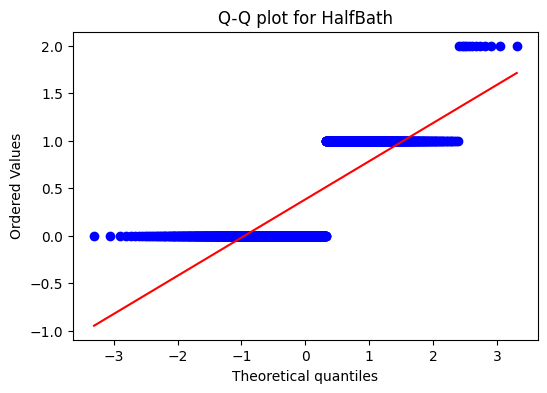

Kolmogorov-Smirnov Test for HalfBath:
Statistic: 0.40212136945976634, p-value: 1.1636625906056464e-213 (La distribución no es normal)


--- BedroomAbvGr ---


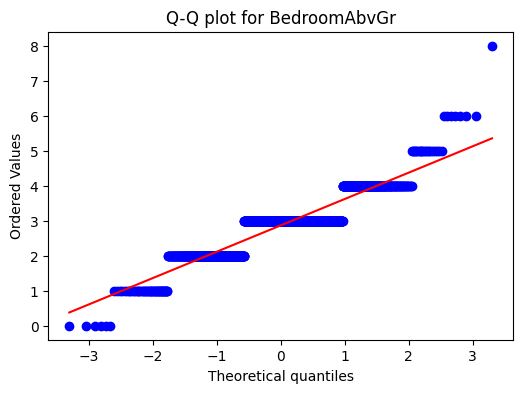

Kolmogorov-Smirnov Test for BedroomAbvGr:
Statistic: 0.28146375821539016, p-value: 8.343039805099308e-103 (La distribución no es normal)


--- KitchenAbvGr ---


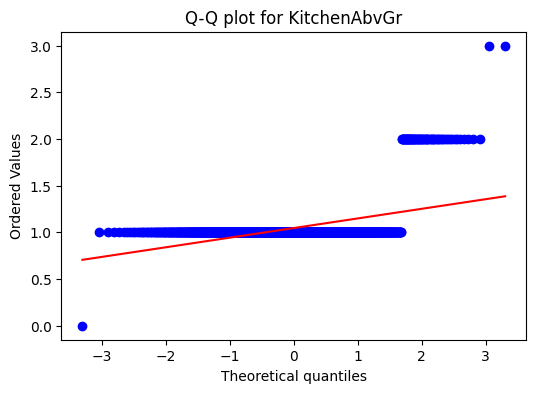

Kolmogorov-Smirnov Test for KitchenAbvGr:
Statistic: 0.5378146580090002, p-value: 0.0 (La distribución no es normal)


--- TotRmsAbvGrd ---


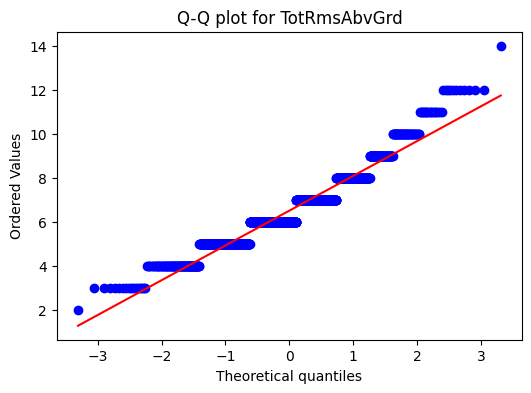

Kolmogorov-Smirnov Test for TotRmsAbvGrd:
Statistic: 0.16744100876172563, p-value: 3.009808438729802e-36 (La distribución no es normal)


--- Fireplaces ---


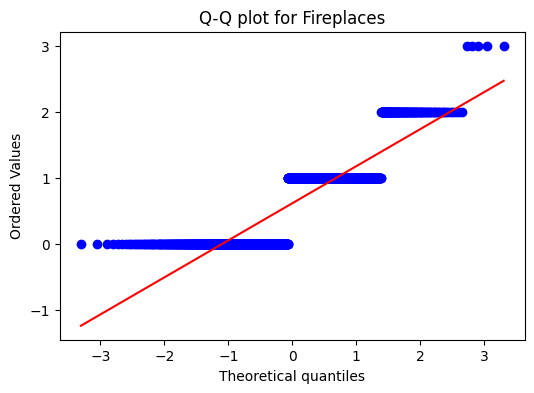

Kolmogorov-Smirnov Test for Fireplaces:
Statistic: 0.30177533887411667, p-value: 1.922150897572374e-118 (La distribución no es normal)


--- GarageYrBlt ---


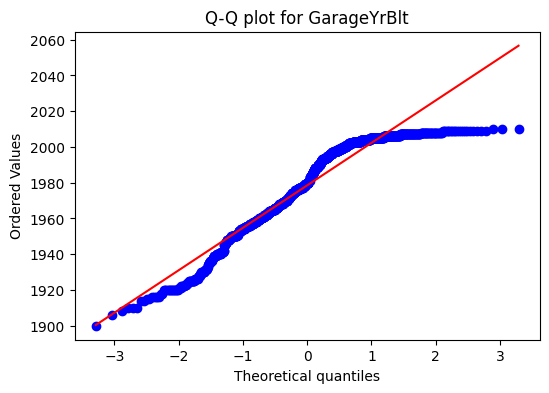

Kolmogorov-Smirnov Test for GarageYrBlt:
Statistic: 0.12750267840601237, p-value: 5.29460407675341e-20 (La distribución no es normal)


--- GarageCars ---


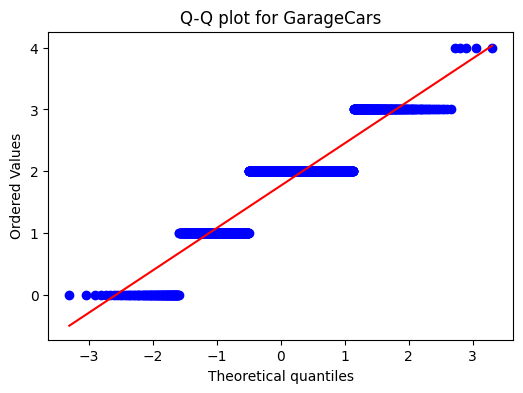

Kolmogorov-Smirnov Test for GarageCars:
Statistic: 0.31411534638221306, p-value: 1.5969413876256722e-128 (La distribución no es normal)


--- GarageArea ---


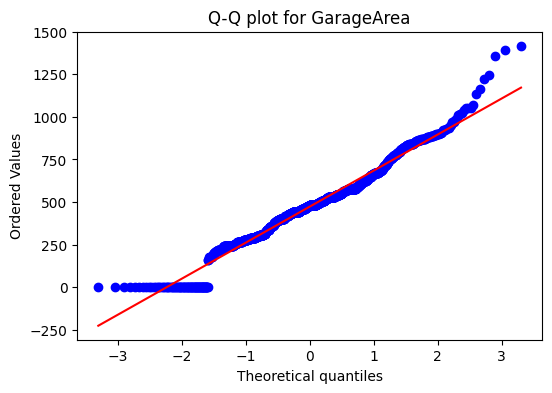

Kolmogorov-Smirnov Test for GarageArea:
Statistic: 0.07534290769714735, p-value: 1.1816934743078868e-07 (La distribución no es normal)


--- WoodDeckSF ---


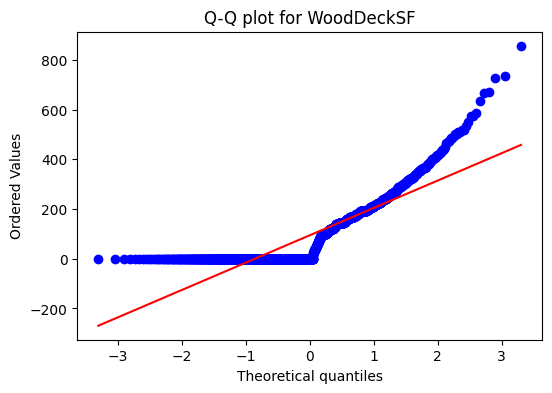

Kolmogorov-Smirnov Test for WoodDeckSF:
Statistic: 0.2951827502722108, p-value: 3.0817111242447026e-113 (La distribución no es normal)


--- OpenPorchSF ---


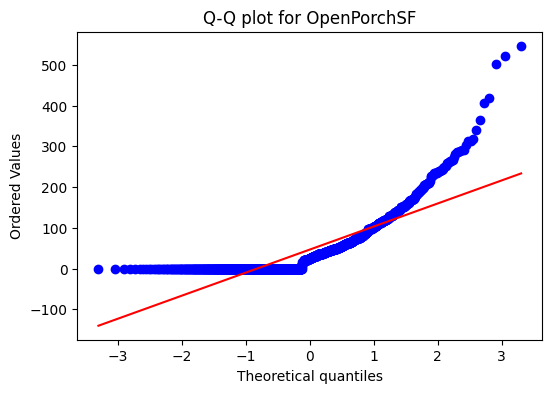

Kolmogorov-Smirnov Test for OpenPorchSF:
Statistic: 0.24064105596906943, p-value: 6.770613594184965e-75 (La distribución no es normal)


--- EnclosedPorch ---


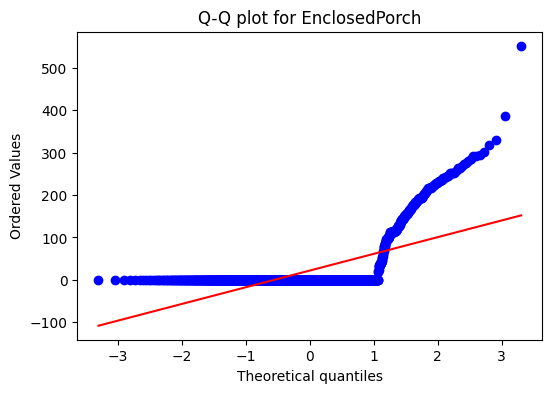

Kolmogorov-Smirnov Test for EnclosedPorch:
Statistic: 0.4978121900427338, p-value: 0.0 (La distribución no es normal)


--- 3SsnPorch ---


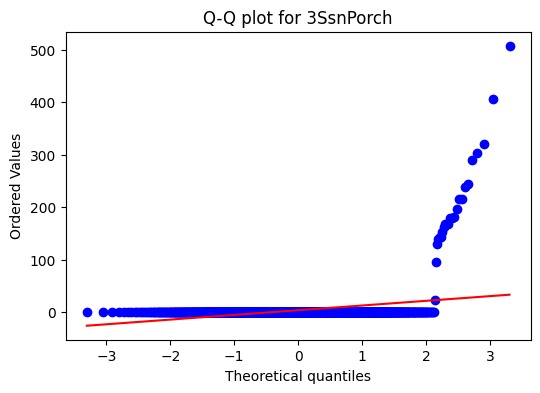

Kolmogorov-Smirnov Test for 3SsnPorch:
Statistic: 0.5298540279788717, p-value: 0.0 (La distribución no es normal)


--- ScreenPorch ---


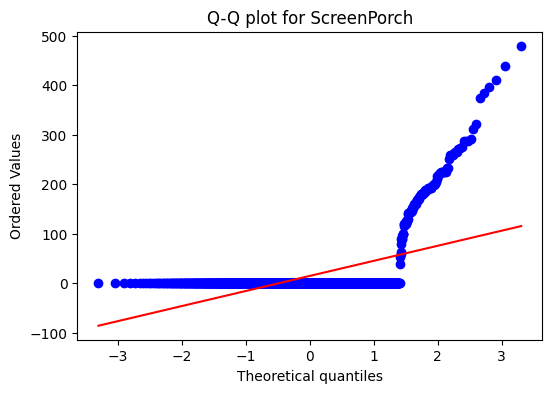

Kolmogorov-Smirnov Test for ScreenPorch:
Statistic: 0.5270123621214219, p-value: 0.0 (La distribución no es normal)


--- PoolArea ---


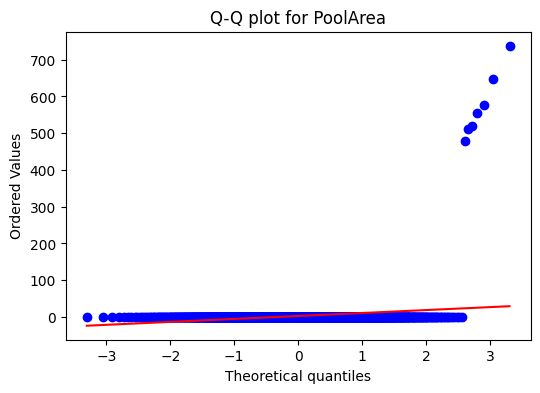

Kolmogorov-Smirnov Test for PoolArea:
Statistic: 0.522578621410714, p-value: 0.0 (La distribución no es normal)


--- MiscVal ---


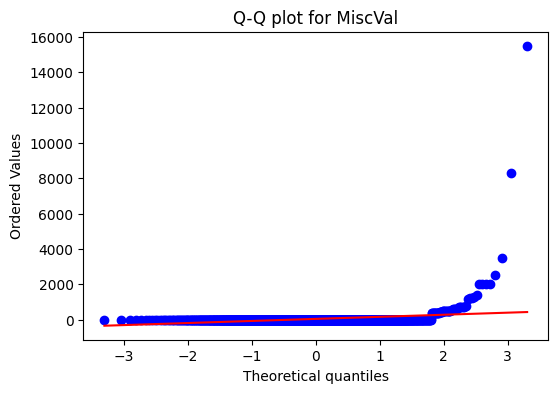

Kolmogorov-Smirnov Test for MiscVal:
Statistic: 0.4993092216364353, p-value: 0.0 (La distribución no es normal)


--- MoSold ---


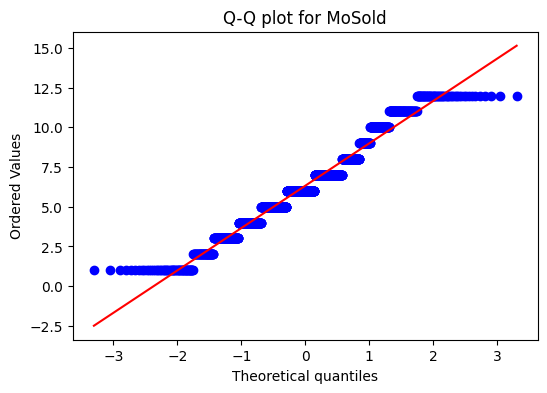

Kolmogorov-Smirnov Test for MoSold:
Statistic: 0.11879076846096726, p-value: 2.0780400418738044e-18 (La distribución no es normal)


--- YrSold ---


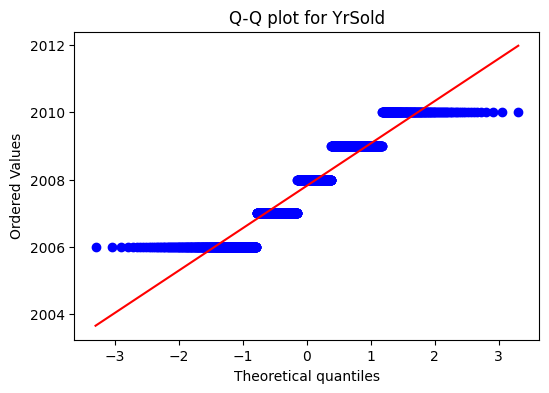

Kolmogorov-Smirnov Test for YrSold:
Statistic: 0.17087867580411353, p-value: 9.630812308688394e-38 (La distribución no es normal)


--- SalePrice ---


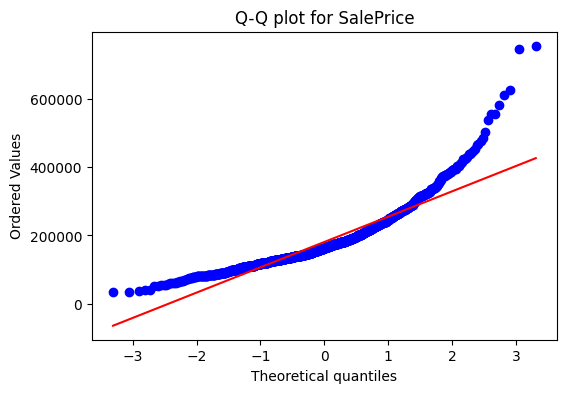

Kolmogorov-Smirnov Test for SalePrice:
Statistic: 0.12368542719946385, p-value: 6.330230702928438e-20 (La distribución no es normal)




In [76]:
existing_columns_to_plot = [col for col in columns_to_plot if col in data_without_id.columns]

# Realizar pruebas de normalidad y graficar QQ plots
results = []
for column in existing_columns_to_plot:
    print(f"--- {column} ---")
    # QQ Plot
    fig = plt.figure(figsize=(6, 4))
    res = stats.probplot(data_without_id[column].dropna(), plot=plt)
    plt.title(f"Q-Q plot for {column}")
    plt.show()

    # Kolmogorov-Smirnov test for normality
    normed_data = (data_without_id[column].dropna() - data_without_id[column].mean()) / data_without_id[column].std()
    ks_test = stats.kstest(normed_data, 'norm')
    normality_text = "La distribución es normal" if ks_test.pvalue > 0.05 else "La distribución no es normal"
    print(f"Kolmogorov-Smirnov Test for {column}:\nStatistic: {ks_test.statistic}, p-value: {ks_test.pvalue} ({normality_text})\n\n")

    results.append((column, ks_test.statistic, ks_test.pvalue, normality_text))


#### ¿Qué porcentaje de las columnas (variables) son normales?

In [77]:
# Contar cuántas variables cuantitativas tienen una distribución normal
normal_count = sum(1 for result in results if result[2] > 0.05)

# Calcular el porcentaje
total_quantitative_vars = len(results)
normal_percentage = (normal_count / total_quantitative_vars) * 100

print(f"El porcentaje de variables cuantitativas que siguen una distribución normal es: {normal_percentage:.2f}%")

El porcentaje de variables cuantitativas que siguen una distribución normal es: 0.00%
